In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

We study the energy eigenvalues and eigenstates of a potential well of width $2a$ and depth $V_0$ simmetrically placed around the origin. We compare the results in two cases:
* Infinite domain
* System placed in a box of width $2L$

# Solution in the infinite domain

In this case the system has both bound and unbound solutions. We mainly follow the notation of the book of Gasiorowicz.

In [4]:
V0 = 500
a = 0.5

## Bound state solutions

Outside the potential domain solutions have an exponential behaviour:
$$
\psi(x) = C_1e^{-\mu x} \;\; x > a \quad \psi(x) = C_2e^{\mu x} \;\; x < -a
$$
and $E=-\frac{\mu^2}{2}$. Inside the region of the potential the behavious is oscillatory and it is useful to use the parity symmetry of the potential to separe the solutions in even and odd.

### Even solutions

In this case we have that $\psi(x) = Acos(kx)$ for $|x|<a$. The matching conditions of the wave functions and its derivative at the junction points impose the conditions $\mu= k tan(ka)$. We introduce the auxiliary variables $z=ka$ and $z_0 = \sqrt{2V_0}a^2$ and rewrite the previous condition as (we use the fact that $k^2+\mu^2 = 2V_0)$:
$$
\sqrt{\left(\frac{z_0}{z}\right)^2-1} = tan(z)
$$
and we solve this equation for $z$ (in the range $(0,z_0]$). Once that the solutions are provided we have:
$$
k = \frac{z}{a} \;\;, \mu = \frac{z}{a}tan(z) \;\;, E = -\frac{1}{2}\left(\frac{z}{a}tan(z)\right)^2
$$
Furthermore we have $C_1=C_2=C$ and:
$$
A = \frac{Ce^{-ztan(z)}}{cos(z)}
$$
and $C$ is determined by the normalization condition of the wave function.

In [4]:
z0 = np.sqrt(2*V0)*a
print('z0 = ',z0)

('z0 = ', 15.811388300841896)


In [5]:
z = np.linspace(1e-4,z0,1000)

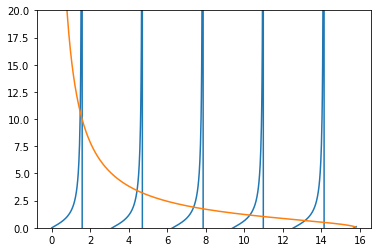

In [6]:
plt.plot(z,np.tan(z))
plt.plot(z,np.sqrt((z0/z)**2-1))
plt.ylim([0,20])
plt.show()

In [7]:
f_sym = lambda x: np.tan(x) - np.sqrt((z0/x)**2-1)

In [10]:
s = np.sign(f_sym(z))

In [8]:
z_zeroes = []
for i in range(len(s)-1):
    if s[i]+s[i+1] == 0:
        zero = optimize.brentq(f_sym, z[i], z[i+1])
        z_zeroes.append(zero)
# cut the spurious solutions
z_zeroes = [z_zeroes[i] for i in range(0,len(z_zeroes),2)]
#z_zeroes

Bound (even) energy levels:

In [9]:
Energy_eID = [-0.5*(val/a*np.tan(val))**2 for val in z_zeroes]
print('Number of bound states = ',len(Energy_eID))
for i,e in enumerate(Energy_eID):
    print('E'+str(i)+' = ',e)

Number of bound states =  6
E0 =  -495.6355739281896
E1 =  -460.7766345332049
E2 =  -391.3914606763265
E3 =  -288.34801385072495
E4 =  -153.91686909426528
E5 =  -2.2720098493715524


Calculation of the wave functions

In [10]:
k_e = [val/a for val in z_zeroes]
mu_e = [val/a*np.tan(val) for val in z_zeroes]
C_e = [1 for val in z_zeroes]
C_e = []
for val in z_zeroes:
    num = np.exp(2*val*np.tan(val))
    den = a*(1.0/(np.cos(val)**2)+np.sin(val)/(val*np.cos(val))+1.0/(val*np.tan(val)))
    C_e.append(np.sqrt(num/den))
A_e = [] 
for i,val in enumerate(z_zeroes):
    A_e.append(C_e[i]*np.exp(-val*np.tan(val))/np.cos(val))

In [11]:
x = np.linspace(-2*a,2*a,1000)

In [12]:
def psi_e(i,x):
    out = 0.0
    if x <= -a: out = C_e[i]*np.exp(mu_e[i]*x)
    if x > -a and x <= a: out =  A_e[i]*np.cos(k_e[i]*x)
    if x > a: out = C_e[i]*np.exp(-mu_e[i]*x)
    return out

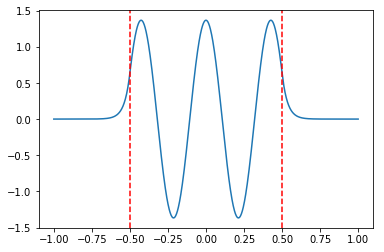

In [13]:
nstate = 2
psival = [psi_e(nstate,val) for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

Numerical check of the normalization of the wavefunction

In [14]:
inte = 0.0
dx = x[1]-x[0]
for p in psival:
    inte += p**2
inte = inte*dx
print(inte)

1.000000101831613


## Unbound state solutions

We build the unbound solution obtained for $E>0$.

### Solutions travelling from the left

Following Gasiorowicz we build solutions "from the left". This means that the wave function is parametrized as follows:
$$
\psi(x) = e^{i k x} + R e^{-ikx} \;\;, x < -a \\
\psi(x) = A e^{i q x} + B e^{-i q x} \;\;, -a< x < a \\
\psi(x) = T e^{i k x} \;\;, x > a
$$
The Schroedinger equation imposes that:
$$
\frac{k^2}{2} = E = \frac{q^2}{2} - V_0
$$
We can parametrize the solution in function of $E$ so that:
$$
k = \sqrt{2E} \;\;, \quad q = \sqrt{2(E+V_0)} 
$$

We propose a solution based on the numerical analysis of the matching of wave function and its derivative:
$$
-e^{ika}R+0+e^{-iqa}A+e^{iqa}B = -e^{ika} \\
ik e^{ika}R+0+iqe^{-iqa}A-iqe^{iqa}B = ike^{-ika} \\
0-e^{ika}T+e^{iqa}A+e^{-iqa}B = 0 \\
0+ike^{ika}T-iqe^{iqa}A+iqe^{-iqa}B = 0
$$
We write this system of equation as $M(E)*C(E) = b(E)$ where C(E) is the column array $[R,T,A,B]$

In [15]:
def k(E): return np.sqrt(2*E)

def q(E): return np.sqrt(2*(E+V0))

def M(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    M = np.array([[-ek,0,1.0/eq,eq],[1j*k(E)*ek,0,1j*q(E)/eq,-1j*q(E)*eq],[0,ek,-eq,-1.0/eq],[0,1j*k(E)*ek,-1j*q(E)*eq,1j*q(E)/eq]])
    return M

def b(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    return np.array([1.0/ek,1j*k(E)/ek,0,0])

def psi_uL(E,C,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+C[0]*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  C[2]*np.exp(1j*q(E)*x)+C[3]*np.exp(-1j*q(E)*x)
    if x > a: out = C[1]*np.exp(1j*k(E)*x)
    return out

True
|R(E)|^2 = 0.5941488434418412
|T(E)|^2 = 0.40585115655815884
 sum = 1.0


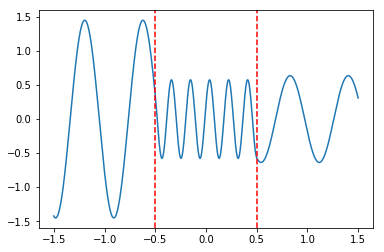

In [16]:
E = 60
C = np.linalg.solve(M(E), b(E))
print(np.allclose(np.dot(M(E), C), b(E)))
print('|R(E)|^2 =', np.absolute(C[0])**2)
print('|T(E)|^2 =', np.absolute(C[1])**2)
print(' sum =', np.absolute(C[1])**2+np.absolute(C[0])**2)
x = np.linspace(-3*a,3*a,1000)
#psival = [np.absolute(psi_uL(E,C,val)) for val in x]
psival = [psi_uL(E,C,val).real for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

We can sum a left and right solution:

In [17]:
def psi_uLR(E,C,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+(C[0]+C[1])*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  (C[2]+C[3])*2.0*np.cos(q(E)*x)
    if x > a: out = np.exp(-1j*k(E)*x)+(C[0]+C[1])*np.exp(1j*k(E)*x)
    return out

True


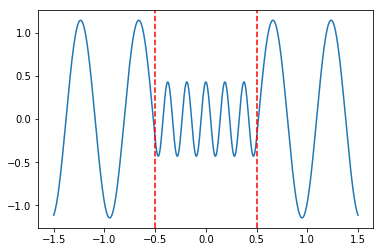

In [18]:
E = 60
C = np.linalg.solve(M(E), b(E))
print(np.allclose(np.dot(M(E), C), b(E)))
x = np.linspace(-3*a,3*a,1000)
#psivalLR = [np.absolute(psi_uLR(E,C,val)) for val in x]
psivalLR = [psi_uLR(E,C,val).real for val in x]
plt.plot(x,psivalLR)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

### Even solution

We directly build a symmetric solution (that however is always complex!). We look for a solution of the form: 
$$
\psi(x) = e^{i k x} + A e^{-ikx} \;\;, x < -a \\
\psi(x) = B cos(q x) \;\;, -a< x < a \\
\psi(x) = e^{-i k x} + A e^{ikx} \;\;, x > a
$$
We write the equations of the boundary conditions. The four equations are equal in pairs and so we obtain two equations for A and B:
$$
e^{-ika}+Ae^{ika} = Bcos(qa) \\
ik(e^{-ika}-Ae^{ika}) = Bqsin(qa)
$$
The two equations can be solved analitically:
$$
A = e^{-2ika}\frac{ik-qtan(qa)}{ik+qtan(qa)} \\
B = 2\frac{e^{-ika}}{cos(qa)}\frac{ik}{ik+qtan(qa)}
$$

In [19]:
def k(E): return np.sqrt(2*E)

def q(E): return np.sqrt(2*(E+V0))

def A(E):
    num = np.exp(-2j*k(E)*a)*(1j*k(E)-q(E)*np.tan(q(E)*a))
    den = 1j*k(E)+q(E)*np.tan(q(E)*a)
    return num / den

def B(E):
    num = 2.0*np.exp(-1j*k(E)*a)*1j*k(E)
    den = np.cos(q(E)*a)*(1j*k(E)+q(E)*np.tan(q(E)*a))
    return num / den

def psi_ue(E,x):
    if x <= -a: out = np.exp(1j*k(E)*x)+A(E)*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  B(E)*np.cos(q(E)*x)
    if x > a: out = np.exp(-1j*k(E)*x)+A(E)*np.exp(1j*k(E)*x)
    return out

In [20]:
# Check the solution
E = 60
print(np.allclose(np.exp(1j*k(E)*(-a))+A(E)*np.exp(-1j*k(E)*(-a)),B(E)*np.cos(q(E)*(-a))))
print(np.allclose(1j*k(E)*(np.exp(1j*k(E)*(-a))-A(E)*np.exp(-1j*k(E)*(-a))),-B(E)*q(E)*np.sin(q(E)*(-a))))

True
True


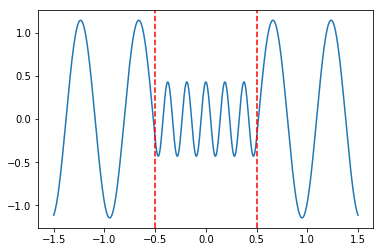

In [21]:
E = 60
x = np.linspace(-3*a,3*a,1000)
#psivalLR = [np.absolute(psi_ue(E,CC,val)) for val in x]
psival = [psi_ue(E,val).real for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')


# Solution in the finite box of width 2L

We build the solutions of the potential well in a box of width 2L (with L>a)

In [5]:
L = 2.0

## Even solutions

We look for a symmetric solution int the form: 
$$
\psi(x) = e^{i k x} + A e^{-ikx} \;\;, x < -a \\
\psi(x) = B cos(q x) \;\;, -a< x < a \\
\psi(x) = e^{-i k x} + A e^{ikx} \;\;, x > a
$$
The Schroedinger equation imposes that:
$$
\frac{k^2}{2} = E = \frac{q^2}{2} - V_0
$$
We can parametrize the solution in function of $E$ so that:
$$
k = \sqrt{2E} \;\;, \quad q = \sqrt{2(E+V_0)} 
$$

### Negative energy solutions

We look for solution with negative energy in the range $[-V_0,0]$. So $k$ is pure imaginary, while $q$ is real and positive. We introduce $\mu=\sqrt{2|E|}$ and choose the root so that $k=-i\mu$. The wf can be written as:
$$
\psi(x) = e^{\mu x} + A e^{-\mu x} \;\;, x < -a \\
\psi(x) = B cos(q x) \;\;, -a< x < a \\
\psi(x) = e^{-\mu x} + A e^{\mu x} \;\;, x > a
$$

The matching conditions can be derived from the solution of the even unbounded solutions in the infinite domain and read:
$$
A = e^{-2\mu a}\frac{\mu-qtan(qa)}{\mu+qtan(qa)} \\
B = 2\frac{e^{-\mu a}}{cos(qa)}\frac{\mu}{\mu+qtan(qa)}
$$
Furthermore the presence of the finite box imposes that $\psi(L)=\psi(-L)=0$ so we have a further condition for A:
$$
A = -e^{-2\mu L}
$$
These conditions impose a quantization condition for the energy. We have to solve:
$$
-\frac{\mu-qtan(qa)}{\mu+qtan(qa)} = e^{-2\mu (L-a)}
$$
It is interesting to discuss the large L limit. In this case the exponential in the rhs is very small and the quantization condition reduces to $\mu=qtan(qa)$ which is exactly the same condition found in the infinite domain. This implies that the energy levels reproduce the ones found in the infinite domain. Furthermore, the A coefficients vanishes and substituting the condition $\mu=qtan(qa)$ in the B coefficient we find:
$$
B = 2\frac{e^{-qatan(qa)}}{cos(qa)}\frac{\mu}{2\mu} = \frac{e^{-qatan(qa)}}{cos(qa)} 
$$
so the wf becomes equal to the one obtained in the infinite domain. 

We compute the energy levels:

In [6]:
muMax = np.sqrt(2.0*V0)
print (muMax)
mu = np.linspace(muMax,0,1000)
def q(mu): return np.sqrt(-mu**2+2*V0)

31.622776601683793


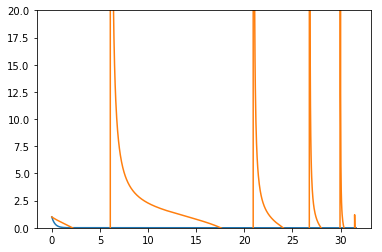

In [7]:
plt.plot(mu,np.exp(-2.0*mu*(L-a)))
plt.plot(mu,-(mu-q(mu)*np.tan(q(mu)*a))/(mu+q(mu)*np.tan(q(mu)*a)))
plt.ylim([0,20])
plt.show()

In [8]:
f_sym = lambda x: np.exp(-2.0*x*(L-a)) + (x-q(x)*np.tan(q(x)*a))/(x+q(x)*np.tan(q(x)*a))

In [9]:
s = np.sign(f_sym(mu))

In [10]:
mu_zeroes = []
for i in range(len(s)-1):
    if s[i]+s[i+1] == 0:
        zero = optimize.brentq(f_sym, mu[i], mu[i+1])
        mu_zeroes.append(zero)
# cut the spurious solutions
mu_zeroes = [mu_zeroes[i] for i in range(0,len(mu_zeroes),2)]
mu_zeroes

[31.484458830771178,
 30.35709586021707,
 27.97825801140333,
 24.014496199201197,
 17.545191312394728,
 2.1282026020690505]

Bound (even) energy levels:

In [11]:
Energy_eBox = [-0.5*val**2 for val in mu_zeroes]
print('Number of bound states = ',len(Energy_eBox))
for i,e in enumerate(Energy_eBox):
    print('E'+str(i)+' = ',e)

('Number of bound states = ', 6)
('E0 = ', -495.6355739332626)
('E1 = ', -460.7766345332041)
('E2 = ', -391.3914606763273)
('E3 = ', -288.3480138507244)
('E4 = ', -153.9168690942657)
('E5 = ', -2.2646231577267386)


In [12]:
Energy_eID

NameError: name 'Energy_eID' is not defined

The negative energy solutions become stable as L is increased and their energy converge to infinite domain result

### Positive energy solutions

In this case we can use the parametrization of the even positive energy solution for the infinite domain. The presence of the box imposes the further constraint:
$$
-\frac{ik-qtan(qa)}{ik+qtan(qa)} = e^{-2ik(L-a)} 
$$
and we remember that $q=\sqrt{k^2+2V_0}$, so this is an equation for k. Also the positive energy solutions are discrete in this case. We can split the previous condition in its real and imaginary part and look for values of k that satisfy both:
$$
-\frac{k^2-(qtan(qa))^2}{k^2+(qtan(qa))^2} = cos(2k(L-a)) \\
\frac{2kqtan(qa)}{k^2+(qtan(qa))^2} = sin(2k(L-a))
$$
We observe that the lhs in independent from L while the rhs oscillates with higher frequency as long as L is increased. The number of interesection between the curves increases as L increases and so, say the first interection point, correspond to a lower value of k. This explain the collapse of the continuum spectrum.

In [13]:
kMax = 60
print ('Emax = ', 0.5*kMax**2)
k = np.linspace(0,kMax,1000)
def q(k): return np.sqrt(k**2+2*V0)

('Emax = ', 1800.0)


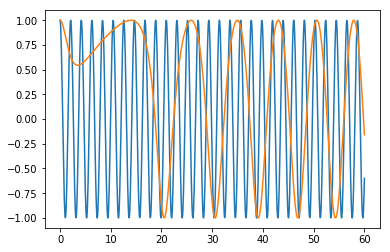

In [14]:
plt.plot(k,np.cos(2.0*k*(L-a)))
plt.plot(k,-(k**2-(q(k)*np.tan(q(k)*a))**2)/(k**2+(q(k)*np.tan(q(k)*a))**2))
#plt.ylim([0,20])
plt.show()

In [15]:
f_sym_re = lambda x: np.cos(2.0*x*(L-a)) + (x**2-(q(x)*np.tan(q(x)*a))**2)/(x**2+(q(x)*np.tan(q(x)*a))**2)

In [16]:
s = np.sign(f_sym_re(k))

In [17]:
k_zeroes_re = []
for i in range(len(s)-1):
    if s[i]+s[i+1] == 0:
        zero = optimize.brentq(f_sym_re, k[i], k[i+1])
        k_zeroes_re.append(zero)
#k_zeroes_re

In [103]:
f_sym_im = lambda x: np.sin(2.0*x*(L-a)) - (2.0*x*q(x)*np.tan(q(x)*a))/(x**2+(q(x)*np.tan(q(x)*a))**2)

In [104]:
k_zeroes = []
for k in k_zeroes_re:
    if np.allclose(f_sym_im(k),0):
        k_zeroes.append(k)
#k_zeroes

In [105]:
len(k_zeroes)

33

We can check the the lenght of k_zeroes (build with a fixed value of Emax) increases as long as L increase, so there are much more state in the region from 0 to Emax. Againg the continuum collapse.

## Comment on the propagation error inside the region of V

Cosa succede se uso gli stati ottenuti nella box per calcolare le osservabili, ovvero per fare integrali con funzioni che stanno nel supporto del potenziale?

Per E<0 la somma sugli stati è discreta sia nel sistema infinito che nella box e le funzioni d'onda della box tendono a quelle del sistema infinito con ottima convergenza, quindi non ci sono problemi.

Per E>0 la somma sugli stati è continua nel sistema infinito mentre diventa discreta nella box. Le funzioni d'onda ottenute nella box (per i k accessibili) mi sembrano essere identiche a quelle che si otterrebbero nel sistema infinito per lo stesso k, quindi non mi sembra che ci sia un discorso di propagazione dell'errore nella parte interna della box...probabilmente il problema va ricondotto alla non possibilità di includere un numero soddisfacente di punti k se la box è troppo piccola...

Analysis of psi bound with different values of L

In [123]:
def q(mu): return np.sqrt(-mu**2+2*V0)

def f_sym(x): 
    #print('l =',l)
    return np.exp(-2.0*x*(l-a)) + (x-q(x)*np.tan(q(x)*a))/(x+q(x)*np.tan(q(x)*a))

def A(mu):
    #num = np.exp(-2.0*mu*a)*(mu-q(mu)*np.tan(q(mu)*a))
    #den = mu+q(mu)*np.tan(q(mu)*a)
    #return num / den
    return -np.exp(-2.0*mu*l)

def B(mu):
    num = 2.0*np.exp(-mu*a)*mu
    den = np.cos(q(mu)*a)*(mu+q(mu)*np.tan(q(mu)*a))
    return num / den

def N(mu):
    a1 = B(mu)**2/q(mu)*(q(mu)*a+0.5*np.sin(2.0*q(mu)*a))
    a2 = -1.0/mu*(np.exp(-2.0*mu*l)-np.exp(-2.0*mu*a))+4.0*A(mu)*(l-a)+A(mu)**2/mu*(np.exp(2.0*mu*l)-np.exp(2.0*mu*a))
    return np.sqrt(a1+a2)

def psi(mu,x):
    if x <= -a: out = np.exp(mu*x)+A(mu)*np.exp(-mu*x)
    if x > -a and x <= a: out =  B(mu)*np.cos(q(mu)*x)
    if x > a: out = np.exp(-mu*x)+A(mu)*np.exp(mu*x)
    return out/N(mu)

In [124]:
L = [1.0,1.5]

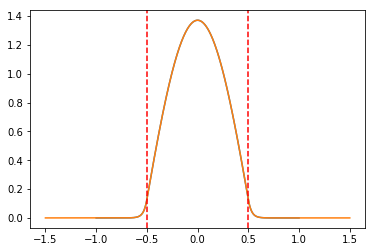

In [133]:
level = 0

# found the allowed values of mu for each value of L
muMax = np.sqrt(2.0*V0)
mu = np.linspace(muMax,0,1000)
muL = []
psiL = []
xL = []
for l in L:
    mu_zeroes = []
    s = np.sign(f_sym(mu))
    for i in range(len(s)-1):
        if s[i]+s[i+1] == 0:
            zero = optimize.brentq(f_sym, mu[i], mu[i+1])
            mu_zeroes.append(zero)
    # cut the spurious solutions
    mu_zeroes = [mu_zeroes[i] for i in range(0,len(mu_zeroes),2)]
    muL.append(mu_zeroes)

#build the wave function for each value of L
for i,l in enumerate(L):
    x = np.linspace(-l,l,1000)
    #print(muL[i][level])
    psival = [psi(muL[i][level],val) for val in x]
    xL.append(x)
    psiL.append(psival)

for i in range(len(L)):
    plt.plot(xL[i],(i+1)*0.0+np.array(psiL[i]))
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

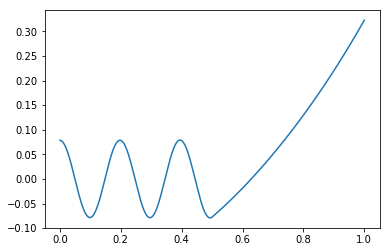

In [158]:
level = 5

# found the allowed values of mu for each value of L
muMax = np.sqrt(2.0*V0)
mu = np.linspace(muMax,0,1000)
muL = []
psiL = []
for l in L:
    mu_zeroes = []
    s = np.sign(f_sym(mu))
    for i in range(len(s)-1):
        if s[i]+s[i+1] == 0:
            zero = optimize.brentq(f_sym, mu[i], mu[i+1])
            mu_zeroes.append(zero)
    # cut the spurious solutions
    mu_zeroes = [mu_zeroes[i] for i in range(0,len(mu_zeroes),2)]
    muL.append(mu_zeroes)

#build the wave function for each value of L
x = np.linspace(0,L[0],1000)
for i,l in enumerate(L):
    psival = [psi(muL[i][level],val) for val in x]
    psiL.append(psival)

diffe = np.array(psiL[1])-np.array(psiL[0])
plt.plot(x,diffe)

The difference is higher near the edge of the box!